In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import gym
import random
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
from grid_world import GridWorldEnv
from Policy import Policy

# Gradient of Log-probability for Tabular Policy (From Lecture Note)
<img src="derivation.png">

# REINFORCE Algorithm

In [36]:
def get_trajectory(env, episode_length):
    states = np.zeros(episode_length+1, dtype=int)
    actions = np.zeros(episode_length, dtype=int)
    rewards = np.zeros(episode_length, dtype=int)
    x, y = env.reset()
    states[0] = x * 5 + y
    for i in range(episode_length):
        action = env.action()
        observation, reward, done, info = env.step(action)
        states[i+1] = observation[0] * 5 + observation[1]
        actions[i] = action
        rewards[i] = reward
    return states, actions, rewards

def gradient(s, a, policy):
    dJ = np.zeros(policy.shape)
    p_action = np.exp(policy[s][a]) / np.sum(np.exp(policy[s]))
    dJ[s][:] = -p_action
    dJ[s][a] = 1 - p_action
    return dJ

In [37]:
def REINFORCE(level, epsilon, episode_length, n_batch, n_episode, learning_rate):
    env = Policy(level, epsilon)
    episode_array = []
    reward_array = []
    batch_size = int(n_episode / n_batch)
    for n in range(n_batch):
        episode_array.append(n*batch_size)
        reward_sum = 0
        policy = env.get_policy()
        dJ_all = np.zeros(policy.shape)
        for b in range(batch_size):
            states, actions, rewards = get_trajectory(env, episode_length)
            dJ = np.zeros(policy.shape)
            for t in range(episode_length):
                dJ += gradient(states[t], actions[t], policy)
            dJ_all += dJ * rewards.sum() / batch_size
            reward_sum += rewards.sum() / batch_size
        env.update(learning_rate * dJ_all)
        reward_array.append(reward_sum)
    states, actions, rewards = get_trajectory(env, episode_length)
    return episode_array, reward_array, (states, actions, rewards)

# Convergence of REINFORCE for Differente Hyperparameters

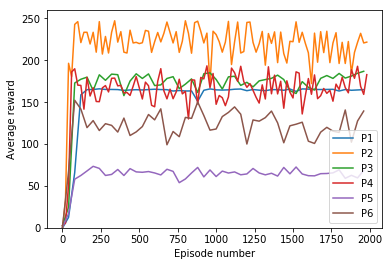

In [25]:
# level, epsilon, episode_length, n_batch, n_episode
r_episode_1, r_reward_1, _ = REINFORCE('easy', 0.1, 100, 50, 2000, 0.1)
r_episode_2, r_reward_2, _ = REINFORCE('easy', 0.1, 100, 100, 2000, 0.1)
r_episode_3, r_reward_3, _ = REINFORCE('hard', 0.1, 100, 50, 2000, 0.1)
r_episode_4, r_reward_4, _ = REINFORCE('hard', 0.1, 100, 100, 2000, 0.1)
r_episode_5, r_reward_5, _ = REINFORCE('hard', 0.3, 100, 50, 2000, 0.1)
r_episode_6, r_reward_6, _ = REINFORCE('hard', 0.1, 100, 50, 2000, 0.3)
plt.plot(r_episode_1, r_reward_1, label='P1')
plt.plot(r_episode_2, r_reward_2, label='P2')
plt.plot(r_episode_3, r_reward_3, label='P3')
plt.plot(r_episode_4, r_reward_4, label='P4')
plt.plot(r_episode_5, r_reward_5, label='P5')
plt.plot(r_episode_6, r_reward_6, label='P6')
plt.xlabel('Episode number')
plt.ylabel('Average reward')
plt.ylim(bottom=0)
plt.legend()
plt.show()

We can find that the graph of P3 has a best convergence and reward. And the bigger batch size have a better convergence. The high random epsilon will make the reward lower. And the high learning rate also make the curve hard to converge.

# Convergence of Q_SARSA_REINFORCE for Differente Hyperparameters

In [26]:
def Q_SARSA(mode, level, learning_rate, decay, epsilon, episode_length, n_episode):
    env = GridWorldEnv(mode, level, learning_rate, decay, epsilon)
    env = env.unwrapped
    episode_array = []
    reward_array = []
    for epi in range(n_episode):
        observation = env._reset()
        episode_array.append(epi)
        reward_sum = 0
        for t in range(episode_length):
            action = env.action()
            observation, reward, done, info = env._step(action)
            reward_sum += reward
        reward_array.append(reward_sum)
    return episode_array, reward_array

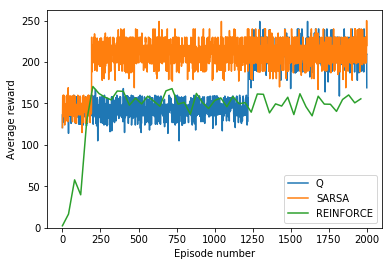

In [40]:
q_episode, q_reward = Q_SARSA('Q', 'hard', 0.1, 0.9, 0.1, 100, 2000)
sarsa_episode, sarsa_reward = Q_SARSA('SARSA', 'hard', 0.1, 0.9, 0.1, 100, 2000)
r_episode, r_reward, trajectory = REINFORCE('hard', 0.1, 100, 50, 2000, 0.1)
plt.plot(q_episode, q_reward, label='Q')
plt.plot(sarsa_episode, sarsa_reward, label='SARSA')
plt.plot(r_episode, r_reward, label='REINFORCE')
plt.xlabel('Episode number')
plt.ylabel('Average reward')
plt.ylim(bottom=0)
plt.legend()
plt.show()

We can find that the convergence speed in this particular case is: REINFORCE > SARSA > Q

# Sample Trajectory

In [42]:
states, actions, rewards = trajectory
x = np.zeros(states.shape, dtype=int)
y = np.zeros(states.shape, dtype=int)
for i in range(len(states)):
    x[i] = states[i] / 5
    y[i] = states[i] % 5
    if i != len(states)-1:
        print('x = {}, y = {}, action = {}, rewards = {}'.format(x[i], y[i], actions[i], rewards[i]))
    else:
        print('x = {}, y = {}'.format(x[i], y[i]))

x = 2, y = 4, action = 1, rewards = 0
x = 1, y = 4, action = 1, rewards = 0
x = 0, y = 4, action = 0, rewards = 5
x = 2, y = 3, action = 1, rewards = 0
x = 1, y = 3, action = 1, rewards = 5
x = 2, y = 3, action = 1, rewards = 0
x = 1, y = 3, action = 1, rewards = 5
x = 2, y = 3, action = 1, rewards = 0
x = 1, y = 3, action = 1, rewards = 5
x = 2, y = 3, action = 1, rewards = 0
x = 1, y = 3, action = 1, rewards = 5
x = 2, y = 3, action = 0, rewards = 0
x = 2, y = 2, action = 1, rewards = 0
x = 1, y = 2, action = 1, rewards = 0
x = 0, y = 2, action = 3, rewards = 0
x = 1, y = 2, action = 1, rewards = 0
x = 0, y = 2, action = 3, rewards = 0
x = 1, y = 2, action = 1, rewards = 0
x = 0, y = 2, action = 3, rewards = 0
x = 1, y = 2, action = 1, rewards = 0
x = 0, y = 2, action = 3, rewards = 0
x = 1, y = 2, action = 1, rewards = 0
x = 0, y = 2, action = 3, rewards = 0
x = 1, y = 2, action = 1, rewards = 0
x = 0, y = 2, action = 3, rewards = 0
x = 1, y = 2, action = 1, rewards = 0
x = 0, y = 2